In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("F:/ml-nids-far-reduction/dataset/02-21-2018_ddos_hoic.csv",low_memory=False)
df.columns=df.columns.str.strip()
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [3]:
df['Label']=df['Label'].astype(str).str.strip()
df['Label']=df['Label'].apply(lambda x:0 if x=='Benign' else 1)

In [5]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isna().sum().sum()

np.int64(0)

In [6]:
df.drop(columns=['Timestamp'],inplace=True)

In [7]:
df['Label'].value_counts(normalize=True)

Label
1    0.650028
0    0.349972
Name: proportion, dtype: float64

In [8]:
benign_df=df[df['Label']==0] #creating separate subsets for each label
attack_df=df[df["Label"]==1]
print(len(benign_df),len(attack_df))

360827 670191


In [9]:
attack_sample=attack_df.sample(n=int(len(benign_df)*0.18),random_state=42) #intentionally reversing imbalance
df=pd.concat([benign_df,attack_sample])

In [10]:
df=df.sample(frac=1,random_state=42)
df["Label"].value_counts(normalize=True)

Label
0    0.847459
1    0.152541
Name: proportion, dtype: float64

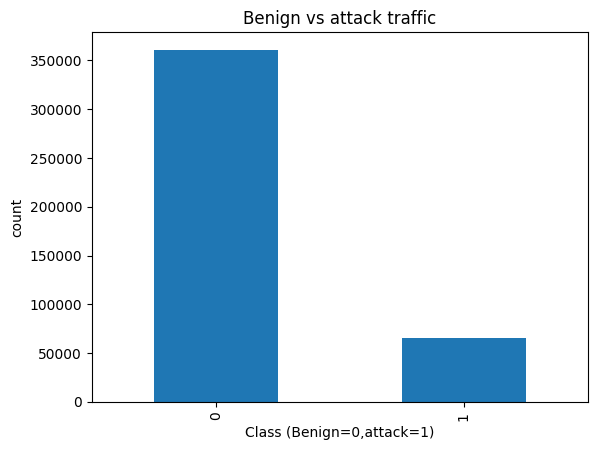

In [11]:
df['Label'].value_counts().plot(kind='bar')
plt.title("Benign vs attack traffic")
plt.xlabel("Class (Benign=0,attack=1)")
plt.ylabel("count")
plt.savefig("figures/class_distribution.png")

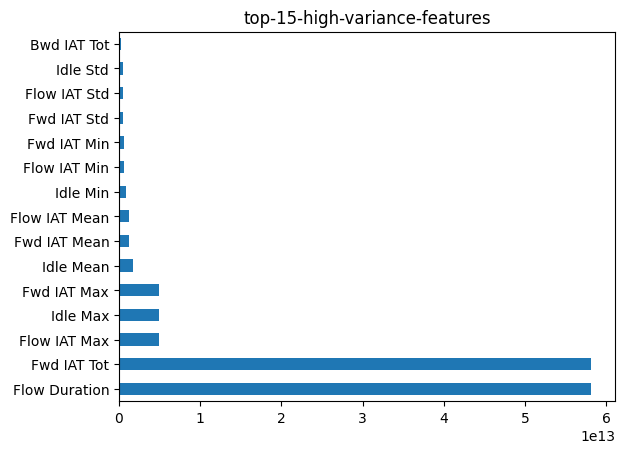

In [12]:
variance=df.var(numeric_only=True).sort_values(ascending=False)[:15]
variance.plot(kind="barh")
plt.title("top-15-high-variance-features")
plt.savefig("figures/top_variance_features.png")


In [13]:
X=df.drop(columns=['Label'])
Y=df['Label']
print(X.shape,Y.shape)

(425775, 78) (425775,)


In [14]:

from sklearn.feature_selection import SelectKBest, f_classif #feature selection

selector=SelectKBest(score_func=f_classif,k=20)
X_selected=selector.fit_transform(X,Y)
selected_features=X.columns[selector.get_support()]
pd.DataFrame(X_selected,columns=selected_features)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32 33 34 50 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Dst Port,Fwd Pkt Len Max,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Flow Byts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts
0,61212.0,935.0,187.0,418.144712,157.0,1.034797e+06,935.0,156.125,333.342568,111117.2679,1.0,1.0,0.0,1.0,0.0,178.428571,187.0,157.0,65535.0,32768.0
1,52492.0,935.0,187.0,418.144712,143.5,1.061685e+06,935.0,152.750,331.648157,109990.5000,1.0,1.0,0.0,1.0,0.0,174.571429,187.0,143.5,65535.0,32768.0
2,80.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000,0.000000,0.0000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,32738.0,-1.0
3,49586.0,935.0,187.0,418.144712,162.5,9.677419e+05,935.0,157.500,334.108622,111628.5714,1.0,1.0,0.0,1.0,0.0,180.000000,187.0,162.5,65535.0,32768.0
4,63420.0,935.0,187.0,418.144712,154.5,8.194454e+04,935.0,155.500,333.008794,110894.8571,1.0,1.0,0.0,1.0,0.0,177.714286,187.0,154.5,65535.0,32768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425770,61579.0,935.0,187.0,418.144712,125.0,1.096207e+06,935.0,148.125,329.761142,108742.4107,1.0,1.0,0.0,1.0,0.0,169.285714,187.0,125.0,65535.0,32768.0
425771,80.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000,0.000000,0.0000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,32738.0,-1.0
425772,51784.0,935.0,187.0,418.144712,182.5,1.017214e+06,935.0,162.500,337.257850,113742.8571,1.0,1.0,0.0,1.0,0.0,185.714286,187.0,182.5,65535.0,32768.0
425773,53069.0,935.0,187.0,418.144712,157.5,9.300595e+05,935.0,156.250,333.410408,111162.5000,1.0,1.0,0.0,1.0,0.0,178.571429,187.0,157.5,65535.0,32768.0


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)